# Crop the predicted flood map to the size of the target

In [5]:
import yaml
from osgeo import gdal

# Load configuration
with open('config.yaml') as f:
    config = yaml.safe_load(f)

y_train_path = config['paths']['rasterized_output']
y_train = gdal.Open(y_train_path)
y_train = y_train.GetRasterBand(1).ReadAsArray()

pred_merged_path = config['paths']['merged_raster_output']
pred_merged = gdal.Open(pred_merged_path)
pred_merged = pred_merged.GetRasterBand(1).ReadAsArray()
pred_merged = pred_merged[0:y_train.shape[0], 0:y_train.shape[1]]

(1818, 2161)
(1818, 2161)


# Calculate the moving window similarity index

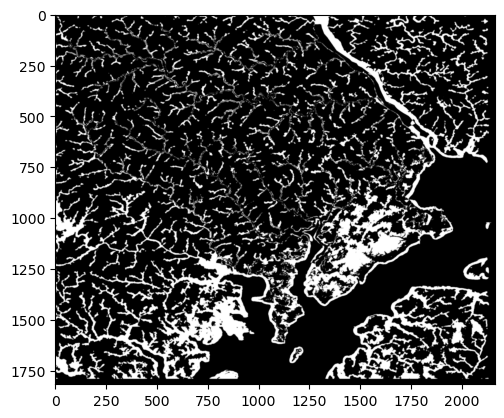

0.8249933005794795


In [11]:
from mwinpy import MWin
mw = MWin(5, 20)
mw.fit(y_train, pred_merged)
mw.plot()
print(mw.sim)